<a href="https://colab.research.google.com/github/natitedros/CNN-Playground/blob/main/digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [7]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [3]:
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


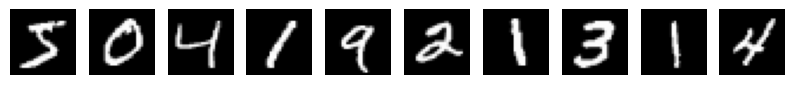

In [5]:
fig, axes = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  axes[i].imshow(train_images[i].reshape(28,28), cmap='gray')
  axes[i].axis('off')
plt.show()

In [6]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam',
              # uses the negative log function when calculating probability
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8701 - loss: 0.4422 - val_accuracy: 0.9587 - val_loss: 0.1259
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9659 - loss: 0.1118 - val_accuracy: 0.9683 - val_loss: 0.0976
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9778 - loss: 0.0727 - val_accuracy: 0.9696 - val_loss: 0.1031
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9832 - loss: 0.0538 - val_accuracy: 0.9766 - val_loss: 0.0781
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9875 - loss: 0.0381 - val_accuracy: 0.9715 - val_loss: 0.0926
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9776 - val_loss: 0.0752
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9911 - loss: 0.0270 - val_accuracy: 0.9743 - val_loss: 0.0946
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9922 - loss: 0.0243 

In [9]:
def view_classify(image, probabilities):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image)
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[3.6611743e-13 2.1762150e-09 8.4014579e-10 1.7389965e-08 2.3969592e-11
  5.6888544e-10 2.9075915e-16 1.0000000e+00 2.4748648e-10 3.7506947e-08]]


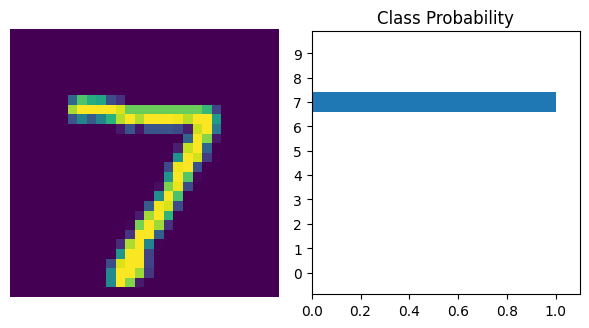

In [11]:
image, label = test_images[0], test_labels[0]
probabilities = model.predict(image.reshape(1, 28, 28, 1))
print(probabilities)
view_classify(image,  probabilities[0])